In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Downloads/StudentsPerformance.csv')
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.shape

(1000, 8)

In [4]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- Since there are no null values in the dataset, no further treatment to improve the data was necessary. So we can directly proceed to explore the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
#checking the no. of unique items present in the categorical column

data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

c:\users\akshay0909\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

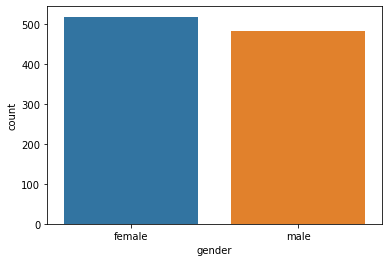

In [10]:
#visualising the number of male and female in the dataset

sns.countplot(data['gender'])

In [11]:
#Calculate Total score as a new column
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

In [12]:
#Calculate Percentage as a new column
data['average_score']=(data['math score']+data['reading score']+data['writing score'])/3

In [13]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [14]:
#Analyzing the correlation between Gender with Score
#The groupby function will take in n number of categorial variables and compare them with the numeric variables in the dataset
data.groupby(['gender']).median()

,math score,reading score,writing score,total_score,average_score
gender,,,,,
female,65,73,74,211,70.333333
male,69,66,64,199,66.333333


- The scores of female students in reading and writing are higher than the scores of males. However, the scores of male students in maths are higher than the scores of female

- Female students performed better than Male students overall,but in maths male students perform good.

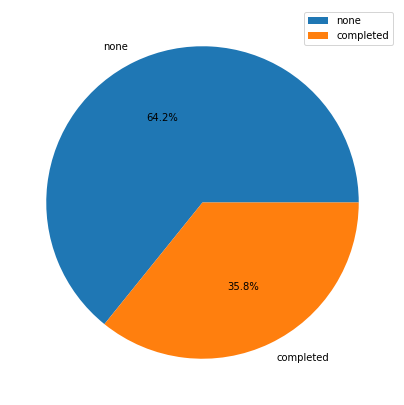

In [15]:
#how many of the students take test preparation course

count_test=data['test preparation course'].value_counts()
labels=data['test preparation course'].value_counts().index
plt.figure(figsize=(7,8))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

- 64.2% of students completed the Test Preparation Course and 35.8% students have not completed

<AxesSubplot:xlabel='gender', ylabel='average_score'>

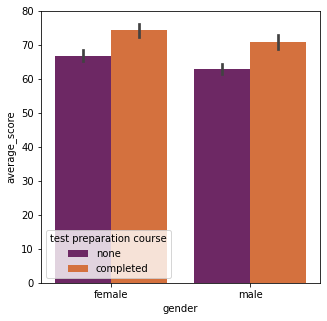

In [16]:
#Analyzing the relation between test_prep and avg_Score
plt.figure(figsize=(5,5))
sns.barplot(x=data['gender'], y=data['average_score'], hue=data['test preparation course'],  palette='inferno')

- Students who completed the test preparation course , on average, performed better on the test and therefore had a higher score

In [17]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).median()

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

- Students who have completed their test preparation have higher scores in all three subjects compared to students who have no test preparation

In [18]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average_score'],
      dtype='object')

In [19]:
#analyzing the relation between parentDegree and Score

data['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

- Parental level of Education has 6 unique values; some high school (a part of high school), high school, some college, bachelor's degree, associate's degree, master's college. Most parents of students have attended college, while very few parents have a master's degree.

<AxesSubplot:xlabel='gender', ylabel='total_score'>

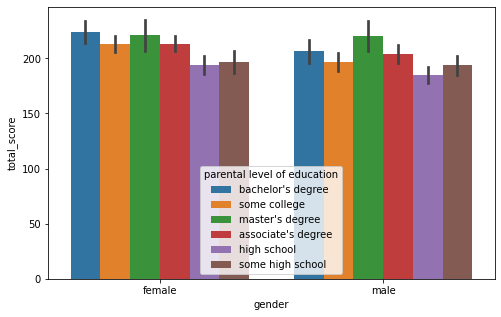

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='total_score', hue='parental level of education', data=data,)

- Students whose parents have a bachelor's or master's degree have higher scores in all three subjects

In [21]:
#Lets check the Effect of Lunch on Students

data[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

<AxesSubplot:xlabel='lunch', ylabel='total_score'>

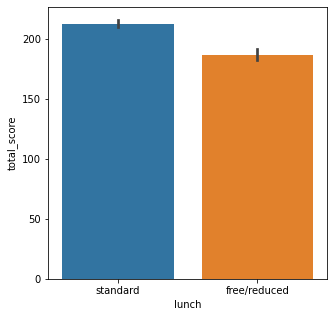

In [22]:
#Visualizing the relation between Lunch and Score
plt.figure(figsize=(5,5))
sns.barplot(x='lunch', y='total_score', data=data)

- we can assume that the students who are given free/reduced lunches are not as fortunate as those that get standard priced lunches which gives us more information about the students' background. From the above graph, we can tell that the students that come from a more fortunate background, on average, performed better on the test.

- The scores of students who opted for standard lunch are higher in all three subjects as compared to free/reduced lunch students

In [23]:
#Lets check the Effect of Race and Ethnicity on Student's Performance
data['race/ethnicity'].value_counts()


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

- Race has 5 unique values; Group A, B, C, D and E. There are more students belonging to Group C. There are less students belonging to Group A.

In [38]:
data.groupby(['race/ethnicity']).median()

,math score,reading score,writing score,total_score,average_score
race/ethnicity,,,,,
group A,61.0,64.0,62.0,184.0,61.333333
group B,63.0,67.0,67.0,195.0,65.000000
group C,65.0,71.0,68.0,205.0,68.333333
group D,69.0,71.0,72.0,210.0,70.000000
group E,74.5,74.0,72.0,220.5,73.500000


- As we can see, group E performed significantly better in Math compared to the other groups.

# students performance in subjects based on gender

<AxesSubplot:xlabel='average_score', ylabel='math score'>

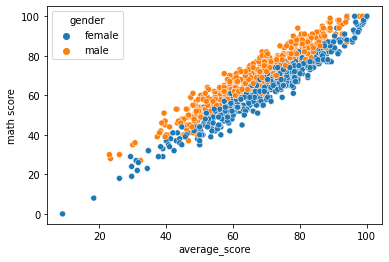

In [30]:
sns.scatterplot(x=data['average_score'],y=data['math score'],hue=data['gender'])

<AxesSubplot:xlabel='average_score', ylabel='reading score'>

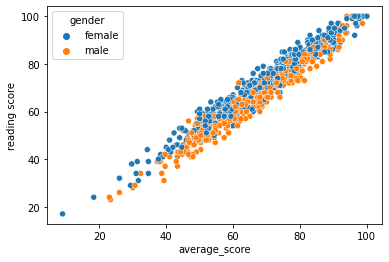

In [31]:
sns.scatterplot(x=data['average_score'],y=data['reading score'],hue=data['gender'])

<AxesSubplot:xlabel='average_score', ylabel='writing score'>

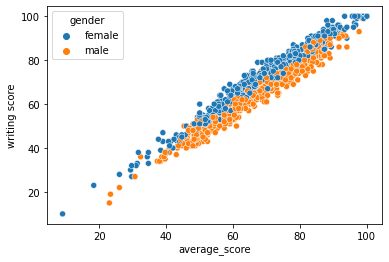

In [32]:
sns.scatterplot(x=data['average_score'],y=data['writing score'],hue=data['gender'])

In [33]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 0.903


In [34]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


# data preparation

In [46]:
gender = {
    'male':1,
    'female':0
}

In [47]:
data['gender']=data['gender'].map(gender)

In [48]:
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4
}

In [49]:
data['race/ethnicity']=data['race/ethnicity'].map(race)

In [50]:
level = {
    "bachelor's degree":0,
    'some college':1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5
}

In [51]:
data['parental level of education']=data['parental level of education'].map(level)

In [52]:
preparation_course={"none":0,
                         'completed':1,
                        }

In [53]:
data['test preparation course']=data['test preparation course'].map(preparation_course)

In [54]:
lunch={'free/reduced':0,
      'standard':1,
     
     }

In [55]:
data['lunch']=data['lunch'].map(lunch)

In [56]:
#data = pd.get_dummies(data,drop_first=True)

In [57]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,0,1,0,1,0,72,72,74,218,72.666667
1,0,2,1,1,1,69,90,88,247,82.333333
2,0,1,2,1,0,90,95,93,278,92.666667
3,1,0,3,0,0,47,57,44,148,49.333333
4,1,2,1,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,4,2,1,1,88,99,95,282,94.000000
996,1,2,4,0,0,62,55,55,172,57.333333
997,0,2,4,0,1,59,71,65,195,65.000000
998,0,3,1,1,1,68,78,77,223,74.333333
